In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/bblais/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['square', 'split', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
import os

In [19]:
board_size=(4,4)

In [20]:
def read_image(fname):
    arr=imread(fname)
    print("Min and Max",arr.min(),arr.max())    
    
    if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
        print("Min and Max",arr.min(),arr.max())
        print("Scaling it down....")
        arr=arr/255
        print("Min and Max",arr.min(),arr.max())    
        
    if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
        print("arr shape",arr.shape)
        print("Removing alpha channel")
        arr=arr[:,:,:3]
        print("new arr shape",arr.shape)
        
        
    arr=arr[30:260,45:310]
    
    return arr

Min and Max 1 233
Min and Max 1 233
Scaling it down....
Min and Max 0.00392156862745098 0.9137254901960784


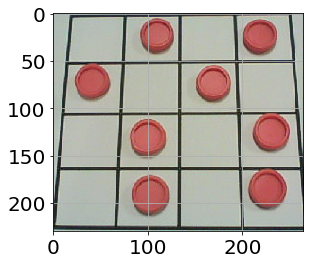

In [21]:
arr=read_image('robot images/test3.jpg')
imshow(arr)

In [22]:
def get_square(arr,Nr,Nc,r,c,percent=100):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    if percent==100:
        square=arr[start_row:end_row,start_col:end_col]
        
    else:
        dc=int((end_col-start_col)*(100-percent)/2.0/100.0)
        dr=int((end_row-start_row)*(100-percent)/2.0/100.0)

        square=arr[start_row+dr:end_row-dr,start_col+dc:end_col-dc]
        
        
    return square

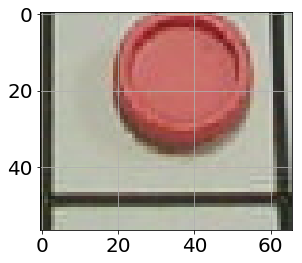

In [23]:
r,c=1,2
square=get_square(arr,board_size[0],board_size[1],r,c,100)
imshow(square)

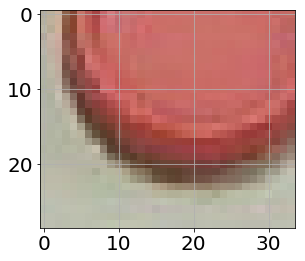

In [24]:
r,c=1,2
square=get_square(arr,board_size[0],board_size[1],r,c,50)
imshow(square)

## Now let's do the clasification

In [25]:
from classy import *

In [26]:
images_train=image.load_images('pieces')
summary(images_train)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'


In [27]:
data_train=image.images_to_vectors(images_train)
if any(data_train.vectors>1):
    print("\nScaling down...")
    data_train.vectors/=255.0
    summary(data_train)
    
data_train=remap_targets(data_train,
                         new_target_names=['white','red','black'])  # make sure the targets match

128 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [147.546875  131.875     126.453125  ... 177.5       176.6328125
 169.09375  ]
Median:  [177. 161. 157. ... 184. 188. 180.]
Stddev:  [53.09703078 56.59905587 54.49438896 ... 23.96449196 34.5983361
 32.94940191]

Scaling down...
128 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.5786152  0.51715686 0.49589461 ... 0.69607843 0.6926777  0.66311275]
Median:  [0.69411765 0.63137255 0.61568627 ... 0.72156863 0.7372549  0.70588235]
Stddev:  [0.20822365 0.22195708 0.21370349 ... 0.0939784  0.13567975 0.12921334]


In [28]:
any(data_train.vectors[0]>1)

False

In [29]:
C=NaiveBayes()

In [30]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.005842924118041992 seconds ')


## Now load a board image and classify each square

In [31]:
def array_to_image_struct(arr):
    if isinstance(arr,list):
        N=len(arr)
        data=Struct()
        data.DESCR="Images"
        data.files=[None]*N
        data.data=arr
        data.targets=[0]*N
        data.target_names=['None']*N
        
        
    else:
        data=Struct()
        data.DESCR="Images"
        data.files=[None]
        data.data=[arr]
        data.targets=[0]
        data.target_names=['None']

    return data



Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314
16 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'
Mean:  [0.55906863 0.53333333 0.51176471 ... 0.67328431 0.67892157 0.65171569]
Median:  [0.69019608 0.66666667 0.65098039 ... 0.73333333 0.7372549  0.70980392]
Stddev:  [0.21254381 0.20976269 0.2076303  ... 0.15108679 0.16394476 0.16307089]


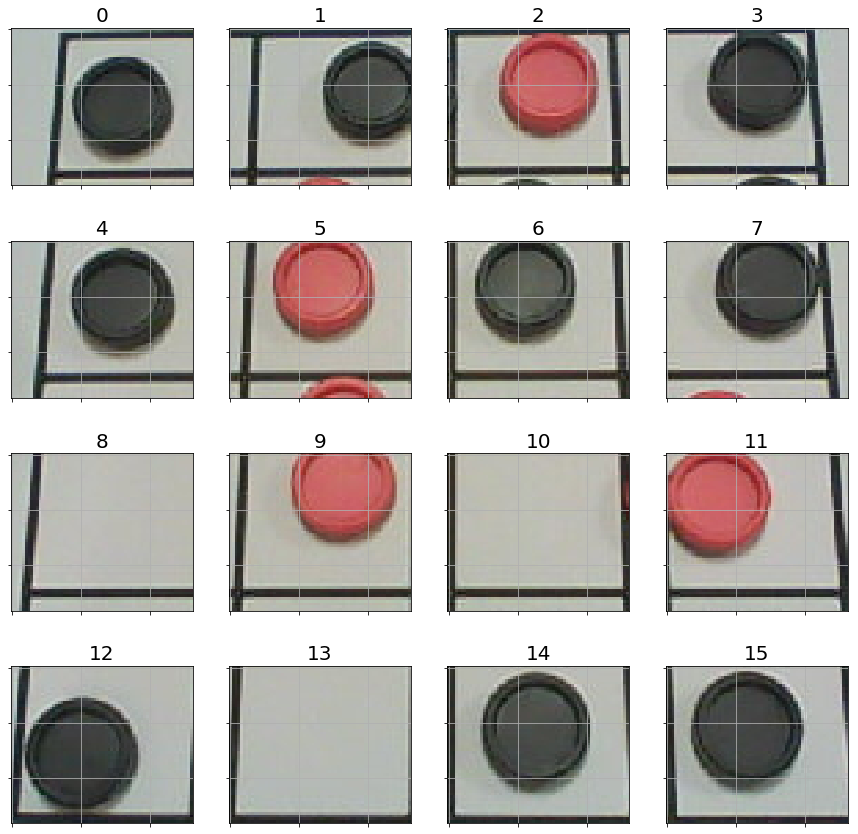

In [32]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
figure(figsize=(15,15))

squares=[]
for r in range(4):
    for c in range(4):
        subplot(4,4,count)
        square=get_square(arr,board_size[0],board_size[1],r,c)
        
        small_square=get_square(arr,board_size[0],board_size[1],r,c,50)
        
        squares.append(small_square)
        
        
        imshow(square)
        title(count-1)
            
        gca().set_xticklabels([])
        gca().set_yticklabels([])
        count+=1
        
square_images=array_to_image_struct(squares)
square_data=image.images_to_vectors(square_images)



In [33]:
data_train.target_names

['white', 'red', 'black']

In [34]:
from Game import *

state=Board(4,4)
state.board=C.predict(square_data.vectors)
print(state)

Version:  0.2.9
 2  2  1  2 
 2  1  2  2 
 0  1  0  1 
 2  0  2  2 

